In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

# Import Data

In [2]:
# import data

import_data = 'data/Pitching.csv'
import_data2 = 'data/Salaries.csv'


pitcher_df = pd.read_csv(import_data)
salary_df = pd.read_csv(import_data2)

# Filter to 2010 - 2016

In [3]:
pitcher_2016 = pitcher_df[(pitcher_df['yearID'] == 2010) | 
                        (pitcher_df['yearID'] == 2011) |
                        (pitcher_df['yearID'] == 2012) |
                        (pitcher_df['yearID'] == 2013) |
                        (pitcher_df['yearID'] == 2014) |
                        (pitcher_df['yearID'] == 2015) |
                        (pitcher_df['yearID'] == 2016)] 

pitcher_2016

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
39749,aardsda01,2010,1,SEA,AL,0,6,53,0,0,...,5.0,2,2.0,0,202.0,43,19,7.0,1.0,5.0
39750,abadfe01,2010,1,HOU,NL,0,1,22,0,0,...,0.0,0,0.0,0,76.0,6,6,0.0,1.0,0.0
39751,accarje01,2010,1,TOR,AL,0,1,5,0,0,...,0.0,2,1.0,0,34.0,2,6,0.0,0.0,2.0
39752,aceveal01,2010,1,NYA,AL,3,0,10,0,0,...,1.0,0,1.0,0,53.0,2,5,0.0,0.0,0.0
39753,acostma01,2010,1,NYN,NL,3,2,41,0,0,...,1.0,3,0.0,0,157.0,12,13,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44962,zastrro01,2016,1,CHN,NL,1,0,8,1,0,...,0.0,0,1.0,0,66.0,1,3,0.0,2.0,1.0
44963,zieglbr01,2016,1,ARI,NL,2,3,36,0,0,...,5.0,0,2.0,0,165.0,30,13,1.0,1.0,10.0
44964,zieglbr01,2016,2,BOS,AL,2,4,33,0,0,...,2.0,1,1.0,0,124.0,12,8,1.0,0.0,6.0
44965,zimmejo02,2016,1,DET,AL,9,7,19,18,0,...,0.0,3,2.0,0,450.0,1,63,1.0,5.0,8.0


In [4]:
salary_2016 = salary_df[(salary_df['yearID'] == 2010) | 
                        (salary_df['yearID'] == 2011) |
                        (salary_df['yearID'] == 2012) |
                        (salary_df['yearID'] == 2013) |
                        (salary_df['yearID'] == 2014) |
                        (salary_df['yearID'] == 2015) |
                        (salary_df['yearID'] == 2016)] 

salary_2016

,yearID,teamID,lgID,playerID,salary
20624,2010,ARI,NL,abreuto01,407000
20625,2010,ARI,NL,boyerbl01,725000
20626,2010,ARI,NL,drewst01,3400000
20627,2010,ARI,NL,gutieju01,411000
20628,2010,ARI,NL,harenda01,8250000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615


# Merge Datasets

In [5]:
# merge pitcher and salary datasets

merge_df = pd.merge(pitcher_2016, salary_2016, on=["playerID","yearID"], how="inner")
merge_df

,playerID,yearID,stint,teamID_x,lgID_x,W,L,G,GS,CG,...,BK,BFP,GF,R,SH,SF,GIDP,teamID_y,lgID_y,salary
0,aardsda01,2010,1,SEA,AL,0,6,53,0,0,...,0,202.0,43,19,7.0,1.0,5.0,SEA,AL,2750000
1,accarje01,2010,1,TOR,AL,0,1,5,0,0,...,0,34.0,2,6,0.0,0.0,2.0,TOR,AL,1080000
2,aceveal01,2010,1,NYA,AL,3,0,10,0,0,...,0,53.0,2,5,0.0,0.0,0.0,NYA,AL,435650
3,adamsmi03,2010,1,SDN,NL,4,1,70,0,0,...,0,268.0,3,14,0.0,0.0,2.0,SDN,NL,1000000
4,affelje01,2010,1,SFN,NL,4,3,53,0,0,...,0,228.0,14,25,7.0,1.0,4.0,SFN,NL,4000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,youngch03,2016,1,KCA,AL,3,9,34,13,0,...,0,406.0,7,63,0.0,4.0,3.0,KCA,AL,4250000
3096,zieglbr01,2016,1,ARI,NL,2,3,36,0,0,...,0,165.0,30,13,1.0,1.0,10.0,ARI,NL,5500000
3097,zieglbr01,2016,2,BOS,AL,2,4,33,0,0,...,0,124.0,12,8,1.0,0.0,6.0,ARI,NL,5500000
3098,zimmejo02,2016,1,DET,AL,9,7,19,18,0,...,0,450.0,1,63,1.0,5.0,8.0,DET,AL,18000000


In [6]:
# drop unwanted columns

na_df = merge_df.drop(['stint','teamID_x','lgID_x','teamID_y','lgID_y'], axis = 1)

na_df

,playerID,yearID,W,L,G,GS,CG,SHO,SV,IPouts,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
0,aardsda01,2010,0,6,53,0,0,0,31,149,...,2,2.0,0,202.0,43,19,7.0,1.0,5.0,2750000
1,accarje01,2010,0,1,5,0,0,0,0,20,...,2,1.0,0,34.0,2,6,0.0,0.0,2.0,1080000
2,aceveal01,2010,3,0,10,0,0,0,1,36,...,0,1.0,0,53.0,2,5,0.0,0.0,0.0,435650
3,adamsmi03,2010,4,1,70,0,0,0,0,200,...,0,0.0,0,268.0,3,14,0.0,0.0,2.0,1000000
4,affelje01,2010,4,3,53,0,0,0,4,150,...,4,3.0,0,228.0,14,25,7.0,1.0,4.0,4000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,youngch03,2016,3,9,34,13,0,0,1,266,...,3,1.0,0,406.0,7,63,0.0,4.0,3.0,4250000
3096,zieglbr01,2016,2,3,36,0,0,0,18,115,...,0,2.0,0,165.0,30,13,1.0,1.0,10.0,5500000
3097,zieglbr01,2016,2,4,33,0,0,0,4,89,...,1,1.0,0,124.0,12,8,1.0,0.0,6.0,5500000
3098,zimmejo02,2016,9,7,19,18,0,0,0,316,...,3,2.0,0,450.0,1,63,1.0,5.0,8.0,18000000


In [7]:
# drop 'NA' rows (1 row was dropped)

df = na_df.dropna()

df

,playerID,yearID,W,L,G,GS,CG,SHO,SV,IPouts,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
0,aardsda01,2010,0,6,53,0,0,0,31,149,...,2,2.0,0,202.0,43,19,7.0,1.0,5.0,2750000
1,accarje01,2010,0,1,5,0,0,0,0,20,...,2,1.0,0,34.0,2,6,0.0,0.0,2.0,1080000
2,aceveal01,2010,3,0,10,0,0,0,1,36,...,0,1.0,0,53.0,2,5,0.0,0.0,0.0,435650
3,adamsmi03,2010,4,1,70,0,0,0,0,200,...,0,0.0,0,268.0,3,14,0.0,0.0,2.0,1000000
4,affelje01,2010,4,3,53,0,0,0,4,150,...,4,3.0,0,228.0,14,25,7.0,1.0,4.0,4000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,youngch03,2016,3,9,34,13,0,0,1,266,...,3,1.0,0,406.0,7,63,0.0,4.0,3.0,4250000
3096,zieglbr01,2016,2,3,36,0,0,0,18,115,...,0,2.0,0,165.0,30,13,1.0,1.0,10.0,5500000
3097,zieglbr01,2016,2,4,33,0,0,0,4,89,...,1,1.0,0,124.0,12,8,1.0,0.0,6.0,5500000
3098,zimmejo02,2016,9,7,19,18,0,0,0,316,...,3,2.0,0,450.0,1,63,1.0,5.0,8.0,18000000


In [8]:
# check columns

for col in df.columns:
    print(col)

playerID
yearID
W
L
G
GS
CG
SHO
SV
IPouts
H
ER
HR
BB
SO
BAOpp
ERA
IBB
WP
HBP
BK
BFP
GF
R
SH
SF
GIDP
salary


# Games started over 10

In [9]:
games_over_ten = df[df['GS'] >= 10] 

games_over_ten

,playerID,yearID,W,L,G,GS,CG,SHO,SV,IPouts,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
7,anderbr04,2010,7,6,19,19,0,0,0,337,...,4,7.0,2,470.0,0,41,3.0,2.0,12.0,410000
8,arroybr01,2010,17,10,33,33,2,0,0,647,...,1,6.0,1,880.0,0,95,6.0,5.0,19.0,11625000
13,baileho02,2010,4,3,19,19,1,1,0,327,...,3,3.0,1,465.0,0,55,2.0,1.0,7.0,418000
14,bakersc02,2010,12,9,29,29,0,0,0,511,...,7,6.0,0,725.0,0,87,1.0,4.0,11.0,3000000
16,bannibr01,2010,7,12,24,23,0,0,0,383,...,10,3.0,0,581.0,1,92,2.0,2.0,5.0,2300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,woodal02,2016,1,4,14,10,0,0,0,181,...,4,3.0,0,255.0,0,30,0.0,2.0,5.0,530000
3092,wrighmi01,2016,3,4,18,12,0,0,0,224,...,2,9.0,0,328.0,5,53,1.0,5.0,10.0,510500
3093,wrighst01,2016,13,6,24,24,4,1,0,470,...,10,8.0,0,656.0,0,74,2.0,2.0,16.0,514500
3095,youngch03,2016,3,9,34,13,0,0,1,266,...,3,1.0,0,406.0,7,63,0.0,4.0,3.0,4250000


# Create Bins

In [10]:
#
df_salary = games_over_ten[['salary']]

new_df = df_salary.describe()

new_df

,salary
count,1.064000e+03
mean,5.815251e+06
std,6.318992e+06
min,4.000000e+05
25%,5.195375e+05
50%,3.547500e+06
75%,9.159375e+06
max,3.300000e+07


# Min = 400,000
# 25% = 519,537
# 50% = 3,547,500
# 75% = 9,159,375
# Max = 33,000,000

In [11]:
#new_df.to_csv('data/salary_data.csv')

In [12]:
salary_bins = pd.cut(df.salary,bins=[0,519537,3547500,9159375,33000000],labels=['Low','Medium','High','Highest'])

salary_bins

0        Medium
1        Medium
2           Low
3        Medium
4          High
         ...   
3095       High
3096       High
3097       High
3098    Highest
3099        Low
Name: salary, Length: 3099, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Highest']

In [13]:
games_over_ten.insert(26,'Salary_Group',salary_bins)


In [14]:
games_over_ten

,playerID,yearID,W,L,G,GS,CG,SHO,SV,IPouts,...,HBP,BK,BFP,GF,R,SH,SF,Salary_Group,GIDP,salary
7,anderbr04,2010,7,6,19,19,0,0,0,337,...,7.0,2,470.0,0,41,3.0,2.0,Low,12.0,410000
8,arroybr01,2010,17,10,33,33,2,0,0,647,...,6.0,1,880.0,0,95,6.0,5.0,Highest,19.0,11625000
13,baileho02,2010,4,3,19,19,1,1,0,327,...,3.0,1,465.0,0,55,2.0,1.0,Low,7.0,418000
14,bakersc02,2010,12,9,29,29,0,0,0,511,...,6.0,0,725.0,0,87,1.0,4.0,Medium,11.0,3000000
16,bannibr01,2010,7,12,24,23,0,0,0,383,...,3.0,0,581.0,1,92,2.0,2.0,Medium,5.0,2300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,woodal02,2016,1,4,14,10,0,0,0,181,...,3.0,0,255.0,0,30,0.0,2.0,Medium,5.0,530000
3092,wrighmi01,2016,3,4,18,12,0,0,0,224,...,9.0,0,328.0,5,53,1.0,5.0,Low,10.0,510500
3093,wrighst01,2016,13,6,24,24,4,1,0,470,...,8.0,0,656.0,0,74,2.0,2.0,Low,16.0,514500
3095,youngch03,2016,3,9,34,13,0,0,1,266,...,1.0,0,406.0,7,63,0.0,4.0,High,3.0,4250000


In [15]:
# check columns

for col in games_over_ten.columns:
    print(col)

playerID
yearID
W
L
G
GS
CG
SHO
SV
IPouts
H
ER
HR
BB
SO
BAOpp
ERA
IBB
WP
HBP
BK
BFP
GF
R
SH
SF
Salary_Group
GIDP
salary


# Random Forest

## Which pitching stats contribute to a higher salary?

In [16]:
target = games_over_ten["salary"]

In [17]:
data = games_over_ten.drop(['salary','Salary_Group','G','GS','playerID'], axis = 1)
feature_names = data.columns
data.head()

,yearID,W,L,CG,SHO,SV,IPouts,H,ER,HR,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
7,2010,7,6,0,0,0,337,112,35,6,...,2.0,4,7.0,2,470.0,0,41,3.0,2.0,12.0
8,2010,17,10,2,0,0,647,188,93,29,...,5.0,1,6.0,1,880.0,0,95,6.0,5.0,19.0
13,2010,4,3,1,1,0,327,109,54,11,...,6.0,3,3.0,1,465.0,0,55,2.0,1.0,7.0
14,2010,12,9,0,0,0,511,186,85,23,...,0.0,7,6.0,0,725.0,0,87,1.0,4.0,11.0
16,2010,7,12,0,0,0,383,158,90,23,...,0.0,10,3.0,0,581.0,1,92,2.0,2.0,5.0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [19]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.0037593984962406013

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.011278195488721804

In [21]:
results_2 = sorted(zip(rf.feature_importances_, feature_names), reverse=True)

results_2

[(0.05666256996459294, 'BB'),
 (0.055339855910298795, 'ERA'),
 (0.054930884291586116, 'BAOpp'),
 (0.054755018465926016, 'SO'),
 (0.05177362852664103, 'BFP'),
 (0.05165570291100528, 'GIDP'),
 (0.051416779286396395, 'HR'),
 (0.05112690211881078, 'IPouts'),
 (0.050238480562762505, 'H'),
 (0.04973242047268827, 'ER'),
 (0.04837154641183102, 'R'),
 (0.04789995653975702, 'WP'),
 (0.04650280811341586, 'HBP'),
 (0.045119481117426224, 'SH'),
 (0.04436637981193173, 'W'),
 (0.04290179067214656, 'L'),
 (0.04148790695060532, 'SF'),
 (0.03863198271930771, 'IBB'),
 (0.035051369341964955, 'yearID'),
 (0.02206191768215118, 'CG'),
 (0.020540321730633162, 'BK'),
 (0.01973653359833514, 'GF'),
 (0.015150702846999478, 'SHO'),
 (0.004545059952786537, 'SV')]

In [22]:
# create dataframe from results

ml_df_2 = pd.DataFrame(results_2, columns = ['result', 'stat'])
ml_df_2

,result,stat
0,0.056663,BB
1,0.055340,ERA
2,0.054931,BAOpp
3,0.054755,SO
4,0.051774,BFP
5,0.051656,GIDP
6,0.051417,HR
7,0.051127,IPouts
8,0.050238,H
9,0.049732,ER


In [23]:
# export to csv

#ml_df_2.to_csv("static/output_data/random_forest_pitchers_10.csv")

<AxesSubplot:>

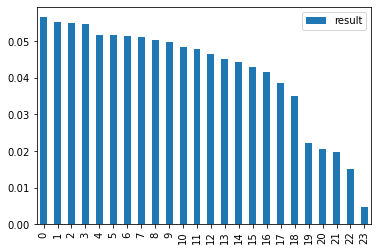

In [24]:
# plot data

ml_df_2.plot.bar()

## Create dataframe using the most important stats (from previous random forest analysis)

### Use SO,  ERA,  BAOpp

### Also use salary_group

In [25]:
# identify column names

for col in games_over_ten.columns:
    print(col)

playerID
yearID
W
L
G
GS
CG
SHO
SV
IPouts
H
ER
HR
BB
SO
BAOpp
ERA
IBB
WP
HBP
BK
BFP
GF
R
SH
SF
Salary_Group
GIDP
salary


In [27]:
# drop unwanted columns in df

log_data = games_over_ten.drop([
'W',
'L',
'G',
'GS',
'CG',
'SHO',
'SV',
'IPouts',
'H',
'ER',
'HR',
'BB',
'IBB',
'WP',
'HBP',
'BK',
'BFP',
'GF',
'R',
'SH',
'SF',
'GIDP',
'salary',
'playerID',
'yearID'
                   ], axis = 1)

log_data

,SO,BAOpp,ERA,Salary_Group
7,75,0.257,2.80,Low
8,121,0.234,3.88,Highest
13,100,0.260,4.46,Low
14,148,0.277,4.49,Medium
16,77,0.302,6.34,Medium
...,...,...,...,...
3088,66,0.245,3.73,Medium
3092,50,0.282,5.79,Low
3093,127,0.235,3.33,Low
3095,94,0.291,6.19,High


# Logistic Regression Model (for pitchers)

In [28]:
# Assign X (data) and y (target)
X = log_data.drop("Salary_Group", axis=1)
y = log_data["Salary_Group"]
print(X.shape, y.shape)

(1064, 3) (1064,)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [31]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [32]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.29448621553884713
Testing Data Score: 0.2669172932330827


In [33]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Highest' 'Low' 'Highest' 'Highest' 'Medium' 'Highest' 'Highest' 'Low'
 'Low' 'Highest']
First 10 Actual labels: ['Low', 'Low', 'Medium', 'High', 'High', 'Highest', 'Highest', 'Highest', 'High', 'High']


In [34]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Highest,Low
1,Low,Low
2,Highest,Medium
3,Highest,High
4,Medium,High
...,...,...
261,High,High
262,Low,High
263,Low,Highest
264,Highest,High


# Test the model by inputing values

In [35]:
# SO,  BAOpp,  ERA


shane_bieber_2019 = np.array([[259.0,0.230,3.28]])

predictions = classifier.predict(shane_bieber_2019)

print(f"Predicted salary range: {predictions}")

Predicted salary range: ['Highest']


In [36]:
test2 = np.array([[40.0,0.257,4.45]])

predictions = classifier.predict(test2)

print(f"Predicted salary range: {predictions}")

Predicted salary range: ['Low']


# Save model to file

In [37]:
# Save the model

from joblib import dump, load
dump(classifier, 'pitcher_model.joblib')

['pitcher_model.joblib']

In [38]:
clf = load('pitcher_model.joblib') 

In [39]:
clf.predict(shane_bieber_2019)

array(['Highest'], dtype=object)

# Save Data to SQLite database

#### ml_df_2
#### games_over_ten

In [40]:
import sqlite3
import sqlalchemy

In [41]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///pitching.sqlite', echo=False)

In [47]:
# first dataset

#ml_df_2.to_sql('pitching_stats', engine, index=False)

In [48]:
# second dataset

#games_over_ten.to_sql('pitcher_stats', engine, index=False)

In [44]:
new_df = pd.read_sql('pitching_stats', engine)

In [45]:
pd.read_sql('pitcher_stats', engine)

,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,...,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary,Salary_Group
0,7,6,19,19,0,0,0,337,112,35,...,7.0,2,470.0,0,41,3.0,2.0,12.0,410000,Low
1,7,6,19,19,0,0,0,337,112,35,...,7.0,2,470.0,0,41,3.0,2.0,12.0,1250000,Medium
2,7,6,19,19,0,0,0,337,112,35,...,7.0,2,470.0,0,41,3.0,2.0,12.0,3250000,Medium
3,7,6,19,19,0,0,0,337,112,35,...,7.0,2,470.0,0,41,3.0,2.0,12.0,5750000,High
4,7,6,19,19,0,0,0,337,112,35,...,7.0,2,470.0,0,41,3.0,2.0,12.0,8000000,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5762,3,4,18,12,0,0,0,224,81,48,...,9.0,0,328.0,5,53,1.0,5.0,10.0,510500,Low
5763,5,6,19,19,0,0,0,343,119,45,...,3.0,3,478.0,0,50,6.0,3.0,13.0,509500,Low
5764,16,11,32,32,0,0,0,527,150,68,...,8.0,0,716.0,0,72,0.0,3.0,10.0,3125000,Medium
5765,9,10,35,20,1,0,0,440,187,93,...,7.0,0,662.0,8,99,0.0,4.0,20.0,507500,Low


In [46]:
result = new_df.to_json(orient='records')

In [49]:
result

'[{"result":0.0626080268,"stat":"SO"},{"result":0.0608182556,"stat":"BB"},{"result":0.0582370281,"stat":"BAOpp"},{"result":0.0578218165,"stat":"ERA"},{"result":0.0553385741,"stat":"IPouts"},{"result":0.0550217197,"stat":"BFP"},{"result":0.053502638,"stat":"HR"},{"result":0.0534589123,"stat":"H"},{"result":0.0527439067,"stat":"GIDP"},{"result":0.0520822567,"stat":"R"},{"result":0.0511117202,"stat":"ER"},{"result":0.0481728104,"stat":"WP"},{"result":0.0478600968,"stat":"HBP"},{"result":0.0457586397,"stat":"SH"},{"result":0.0456553208,"stat":"W"},{"result":0.0449069633,"stat":"L"},{"result":0.0429981944,"stat":"SF"},{"result":0.037555239,"stat":"IBB"},{"result":0.020968142,"stat":"CG"},{"result":0.0196734996,"stat":"BK"},{"result":0.0162273127,"stat":"GF"},{"result":0.0136630144,"stat":"SHO"},{"result":0.0038159122,"stat":"SV"}]'